2) Pergunta: Qual a Mediana de nascimento dos camundongos ? Qual a Mediana de nascimentos para linhagens Isogênicas e Heterogênicas?

In [78]:
#Importando bibliotecas necessárias para a análise.

import matplotlib.pyplot as plt 
import pandas as pd 
import os
import seaborn as sns
# import numpy as np
from statsmodels.tsa.arima_model import ARIMA
#Paramentros para os gráficos
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.rcParams['xtick.labelsize'] = 20 #tamanho da fonte
plt.rcParams['ytick.labelsize'] = 20 #tamanho da fonte

In [79]:
#Filtros para trabalhar com os dados da minha dataframe original

nume_ani = pd.read_csv('../../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
nume_ani = nume_ani[(nume_ani['num_ani'] < 200) 
                    & (nume_ani['util'] == 'nasc')
                    & (nume_ani['ling'] != 'Test')]
 #descarte[(descarte['obs_desc'] != 'AAA')
                   


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Alterando formato da data

datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex']

for d in datas:
    nume_ani[d] = pd.to_datetime(nume_ani[d], unit = 's')
nume_ani.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [86]:
#Substituindo linhagens  - ' S129WT', 'S129WT'] PARA '129/SV-E'

nume_ani['ling'].replace([' S129WT', 'S129WT'], '129/SV-E', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''

#Substituindo linhagens  - ' S129KO'  PARA 'S129KO'

nume_ani['ling'].replace(' S129KO', 'S129KO', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'C57BL06WT'  PARA 'C57BL/6'

nume_ani['ling'].replace(['C57BL06WT','C57BL06WT\t'], 'C57BL/6', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss A' PARA 'Swiss-1 A'

nume_ani['ling'].replace(['Swiss A','Swiss/CFW', 'Swiss/CFW A'], 'Swiss-1 A', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss B' PARA 'Swiss-1 B'

nume_ani['ling'].replace(['Swiss B','Swiss/CFW B'], 'Swiss-1 B', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss C' PARA 'Swiss-1 C'

nume_ani['ling'].replace(['Swiss C','Swiss/CFW C'], 'Swiss-1 C', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss D' PARA 'Swiss-1 D'

nume_ani['ling'].replace(['Swiss D','Swiss/CFW D'], 'Swiss-1 D', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss E' PARA 'Swiss-1 E'

nume_ani['ling'].replace('Swiss E', 'Swiss-1 E', inplace=True)
'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss-2 A' PARA 'Swiss-2 A'

nume_ani['ling'].replace('Swiss-2 A ', 'Swiss-2 A', inplace=True)

In [87]:
nume_ani['ling'].value_counts()

Balb/c       498
C57BL/6      460
S129KO       250
129/SV-E     149
C3H          102
Swiss-1 A     48
Swiss-1 E     47
Swiss-1 C     38
Swiss-1 B     36
Swiss-1 D     33
Swiss-2 C     27
DBA/1J        24
Swiss-2 B     24
Swiss-2 A     21
Swiss-2 D     21
Swiss-2 E     21
AG129          9
Name: ling, dtype: int64

In [88]:
#Agrupando por linhagem
l = nume_ani.groupby('ling')
l.sum()

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
129/SV-E,905,99234,99234,99234,99234,99234,99234,155,228,905,81345,72034,99234,99234
AG129,43,5994,5994,5994,5994,5994,5994,9,9,43,5332,4003,5994,5994
Balb/c,4289,331668,331668,331668,331668,331668,331668,498,802,4289,256073,236898,331668,331668
C3H,603,67932,67932,67932,67932,67932,67932,102,119,603,54003,53996,67932,67932
C57BL/6,4001,306360,306360,306360,306360,306360,306360,462,779,4001,258681,231501,306360,306360
DBA/1J,230,15984,15984,15984,15984,15984,15984,24,47,230,15984,15984,15984,15984
S129KO,1612,166500,166500,166500,166500,166500,166500,252,422,1612,134025,136660,166500,166500
Swiss-1 A,515,31968,31968,31968,31968,31968,31968,48,62,515,27992,28657,31968,31968
Swiss-1 B,381,23976,23976,23976,23976,23976,23976,36,49,381,20001,20000,23976,23976


2) Qual o número total de animais produzidos para cada linhagem? E sua média e mediana?
R. Foi usado uma função que agrupa todos os valores e soma todos os animais por linhagens e depois foi plotado esses valores em um gráfico. Após isso, foi calculada a média e mediana desses valores como um todo.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

  Quais são as informações referentes ao acasalamento e nascimento. Qual é a mediana de nascimentos por linhagem no Biotério?
R. Aqui esse gráfico ainda está apresentando a média e mediana de valores com outliers, podendo ser excluído dos resultados.

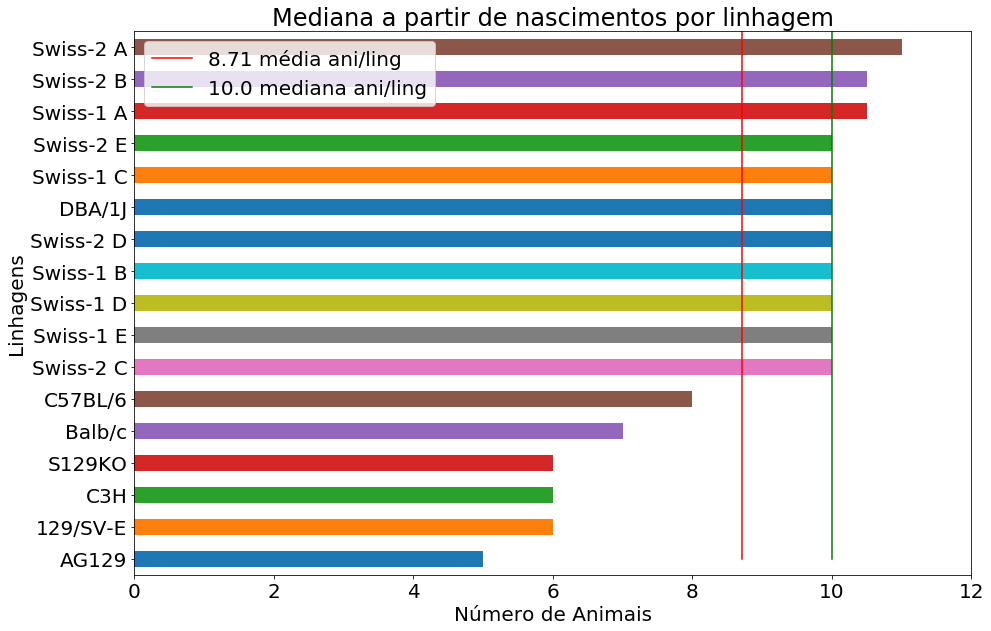

In [89]:
# Plotando Gráfico de medianas referente a todos animais produzidos por linhagem


plt.figure(figsize=(15,10))
plt.title('Mediana a partir de nascimentos por linhagem')

plot = nume_ani.groupby('ling')
plot['num_ani'].median().sort_values(ascending=True).plot(
kind='barh',
     xlim=(0,12) #arrumando a escala do gráfico de 0 a 12
)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Plotagem de faixas (média e mediana)

plt.plot( #função para plotar o gráfico
    [media_grafico, media_grafico], #faixa que marca a média
    [len(nume_ani.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana_grafico, mediana_grafico], #faixa que marca a mediana
    [len(nume_ani.index), 0], 
    c='green' #cor verde da faixa
)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando gráfico com legendas

plt.legend([str(media_grafico) + ' média ani/ling', str(mediana_grafico) + ' mediana ani/ling'])
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Salvando os gráficos
# plt.savefig(
#     fname="../../resultados/numero_mediana_animais.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )



+++++++++++++++++++++++++++ Calculando mediana a partir do grupo isogênico +++++++++++++++++++++++++

In [90]:
ling_iso = ['Balb/c','S129KO','C57BL/6','129/SV-E','C3H','DBA/1J','AG129']

g_iso = nume_ani[nume_ani['ling'].isin(ling_iso)].groupby('ling')
linhagens_iso = g_iso.mean()
linhagens_iso

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
129/SV-E,6.073826,666.0,666.0,666.0,666.0,666.0,666.0,1.040268,1.530201,6.073826,545.939597,483.449664,666.0,666.0
AG129,4.777778,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.000000,4.777778,592.444444,444.777778,666.0,666.0
Balb/c,8.612450,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.610442,8.612450,514.202811,475.698795,666.0,666.0
C3H,5.911765,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.166667,5.911765,529.441176,529.372549,666.0,666.0
C57BL/6,8.697826,666.0,666.0,666.0,666.0,666.0,666.0,1.004348,1.693478,8.697826,562.350000,503.263043,666.0,666.0
DBA/1J,9.583333,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.958333,9.583333,666.000000,666.000000,666.0,666.0
S129KO,6.448000,666.0,666.0,666.0,666.0,666.0,666.0,1.008000,1.688000,6.448000,536.100000,546.640000,666.0,666.0


In [91]:
media_iso = round(linhagens_iso['num_ani'].mean(),2)
media_iso

7.16

In [92]:
mediana_iso = round(linhagens_iso['num_ani'].median(),2)
mediana_iso

6.45

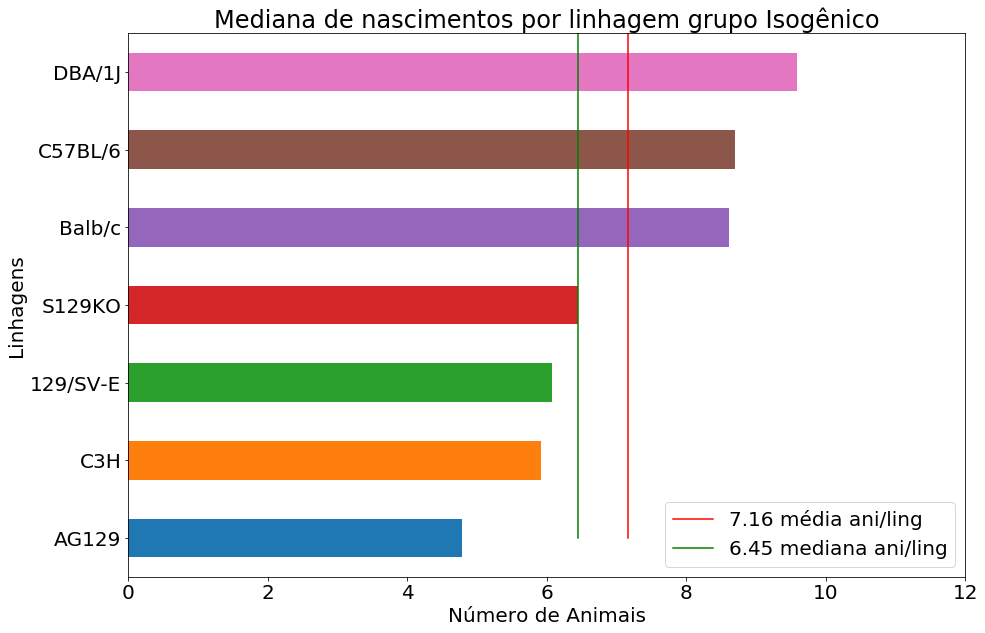

In [93]:
#Gráfico plotando é mediana por grupo: Isogênico

plt.figure(figsize=(15,10))
plt.title('Mediana de nascimentos por linhagem grupo Isogênico')

plot = linhagens_iso.groupby('ling')
plot['num_ani'].mean().sort_values(ascending=True).plot(
kind='barh',
    xlim=(0,12) #arrumando a escala do gráfico de 0 a 12

)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#plotando faixas de média e mediana


plt.plot( #função para plotar o gráfico
    [media_iso, media_iso], #faixa que marca a média
    [len(nume_ani.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana_iso, mediana_iso], #faixa que marca a mediana
    [len(nume_ani.index), 0], 
    c='green' #cor verde da faixa
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando as legendas 

plt.legend([str(media_iso) + ' média ani/ling', str(mediana_iso) + ' mediana ani/ling'])
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Salvando os gráficos
# plt.savefig(
#     fname="../../resultados/numero_media_isogenicos.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )

++++++++++++++++++++++++++++++ Calculando a mediana por grupo Heterogênico +++++++++++++++++++++++++

In [94]:
ling_het = ['Swiss-1 A','Swiss-1 B','Swiss-1 C','Swiss-1 D','Swiss-1 E',
           'Swiss-2 A','Swiss-2 B','Swiss-2 C','Swiss-2 D','Swiss-2 E']  

g_het = nume_ani[nume_ani['ling'].isin(ling_het)].groupby('ling')
linhagens_het = g_het.mean()
linhagens_het

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
Swiss-1 A,10.729167,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.291667,10.729167,583.166667,597.020833,666.0,666.0
Swiss-1 B,10.583333,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.361111,10.583333,555.583333,555.555556,666.0,666.0
Swiss-1 C,12.157895,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.447368,12.157895,526.473684,578.921053,666.0,666.0
Swiss-1 D,10.090909,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.393939,10.090909,525.515152,605.727273,666.0,666.0
Swiss-1 E,11.297872,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.446809,11.297872,623.765957,567.382979,666.0,666.0
Swiss-2 A,10.761905,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.047619,10.761905,602.809524,539.714286,666.0,666.0
Swiss-2 B,10.500000,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.000000,10.500000,583.125000,500.125000,666.0,666.0
Swiss-2 C,9.851852,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.185185,9.851852,616.962963,518.592593,666.0,666.0
Swiss-2 D,11.857143,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.000000,11.857143,508.190476,571.476190,666.0,666.0


In [95]:
mediana_het = round(linhagens_het['num_ani'].median(),2)
mediana_het

10.66

In [96]:
media_het = round(linhagens_het['num_ani'].mean(),2)
media_het

10.77

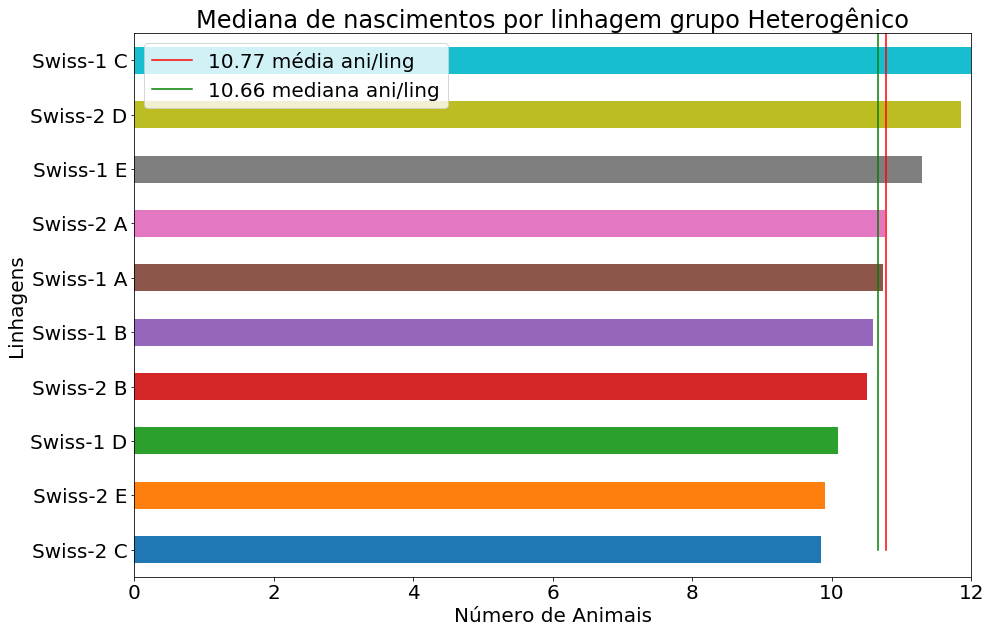

In [97]:
#Gráfico plotando é mediana por grupo: Heterogênico

plt.figure(figsize=(15,10))
plt.title('Mediana de nascimentos por linhagem grupo Heterogênico')

plot = linhagens_het.groupby('ling')
plot['num_ani'].mean().sort_values(ascending=True).plot(
kind='barh',
     xlim=(0,12) #arrumando a escala do gráfico de 0 a 12

)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#plotando faixas de média e mediana


plt.plot( #função para plotar o gráfico
    [media_het, media_het], #faixa que marca a média
    [len(nume_ani.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana_het, mediana_het], #faixa que marca a mediana
    [len(nume_ani.index), 0], 
    c='green' #cor verde da faixa
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando as legendas 

plt.legend([str(media_het) + ' média ani/ling', str(mediana_het) + ' mediana ani/ling'])
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
# plt.savefig(
#     fname="../../resultados/numero_media_heterogenicos.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RETIRANDO OS OUTLIERS DOS DADOS

D. 4) Como os dados se comportam com a retirada dos valores discrepantes?
R. Como avaliado acima, encontrou-se presença de valores discrepantes a partir dos dados analisados ao observar a distância entre a média e mediana dos valores, confimando com um boxsplot e um gráfico de histograma. Como desdobramento, vamos verificar como os dados se comportam após a retirada, traçando filtros de quartis em 25 e  75% dos dados. 

In [75]:
#Criando uma nova Dataframe, filtrando os valores discrepantes
q1 = nume_ani['num_ani'].quantile(0.25) #filtro para a retirada dos valores discrepantes
q3 = nume_ani['num_ani'].quantile(0.75)
iqr = q3 - q1

sem_out = nume_ani[(nume_ani['num_ani'] > (q1 - 1.5 * iqr)) & (nume_ani['num_ani'] < (q3 + 1.5 * iqr))]#dataframe
sem_out.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss-1 E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss-1 E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss-1 E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
122,2014-09-23 18:13:24,Tania,Swiss-1 D,10,AAA,1970-01-01 00:11:06,58,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:26:13,2014-09-23 18:13:24,10,2014-10-14 18:13:24,666,666,666,666,AAA,AAA
123,2014-09-23 18:13:24,Tania,Swiss-1 B,10,AAA,1970-01-01 00:11:06,60,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:38:13,2014-09-23 18:13:24,10,2014-10-14 18:13:24,666,666,666,666,AAA,AAA


In [76]:
#conferindo a mediana dos dados sem outliers
test_g= sem_out.groupby('ling')
test_g.sum()

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
129/SV-E,886,98568,98568,98568,98568,98568,98568,154,225,886,80679,71368,98568,98568
AG129,43,5994,5994,5994,5994,5994,5994,9,9,43,5332,4003,5994,5994
Balb/c,3452,307026,307026,307026,307026,307026,307026,461,734,3452,234084,219538,307026,307026
C3H,603,67932,67932,67932,67932,67932,67932,102,119,603,54003,53996,67932,67932
C57BL/6,3553,295038,295038,295038,295038,295038,295038,445,743,3553,249343,223490,295038,295038
DBA/1J,230,15984,15984,15984,15984,15984,15984,24,47,230,15984,15984,15984,15984
S129KO,1531,164502,164502,164502,164502,164502,164502,249,416,1531,132689,134662,164502,164502
Swiss-1 A,466,30636,30636,30636,30636,30636,30636,46,56,466,26660,27325,30636,30636
Swiss-1 B,353,23310,23310,23310,23310,23310,23310,35,46,353,19335,19334,23310,23310


Após a retirada dos outliers como ficam as informações referentes ao acasalamento e nascimento?. Qual é a mediana de nascimentos por linhagem no Biotério?

Mediana para todas as linhagens - calculo dos traços são os mesmos de acima

D. 5)Após a retirada dos valores discrepantes, foi avaliado os quesitos entre o acasalamente e nascimento dos animais. O primeiro quesito avaliado foi a mediana de nascimentos por linhagens. Ao gerar gráficos entre todas as linhagens a média retorna 8,71 animais por evento de nascimento e a mediana 10,0 animais, lembrando que esses valores são traçados a partir da soma de todos animais e apresentado por cada linhagem.

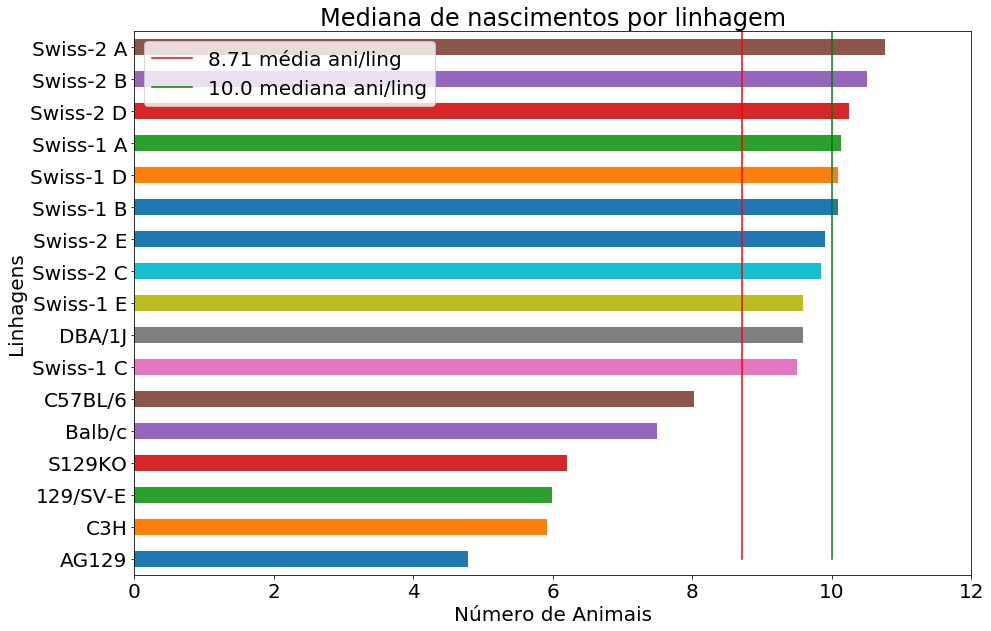

In [46]:
#Gráfico referente a todos animais produzidos por linhagem


plt.figure(figsize=(15,10))
plt.title('Mediana de nascimentos por linhagem')

plot = sem_out.groupby('ling')
plot['num_ani'].mean().sort_values(ascending=True).plot(
kind='barh',
     xlim=(0,12) #arrumando a escala do gráfico de 0 a 12
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#plotando faixas de média e mediana


plt.plot( #função para plotar o gráfico
    [media_grafico, media_grafico], #faixa que marca a média
    [len(sem_out.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana_grafico, mediana_grafico], #faixa que marca a mediana
    [len(sem_out.index), 0], 
    c='green' #cor verde da faixa
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando as legendas 

plt.legend([str(media_grafico) + ' média ani/ling', str(mediana_grafico) + ' mediana ani/ling'])
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../../resultados/mediana_semoutliers.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

++++++++++++++++++++++++++ Calculando a mediana por grupo Isogênico ++++++++++++++++++++++++++++++++

D. 6) Qual é a mediana de nascimentos entre as linhagens isogênicas?

In [98]:
ling_iso = ['Balb/c','S129KO','C57BL/6','129/SV-E','C3H','DBA/1J','AG129']

g_iso = sem_out[sem_out['ling'].isin(ling_iso)].groupby('ling')
linhagens_iso = g_iso.mean()
linhagens_iso

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
129/SV-E,5.986486,666.0,666.0,666.0,666.0,666.0,666.0,1.040541,1.520270,5.986486,545.128378,482.216216,666.0,666.0
AG129,4.777778,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.000000,4.777778,592.444444,444.777778,666.0,666.0
Balb/c,7.488069,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.592191,7.488069,507.774403,476.221258,666.0,666.0
C3H,5.911765,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.166667,5.911765,529.441176,529.372549,666.0,666.0
C57BL/6,8.020316,666.0,666.0,666.0,666.0,666.0,666.0,1.004515,1.677201,8.020316,562.851016,504.492099,666.0,666.0
DBA/1J,9.583333,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.958333,9.583333,666.000000,666.000000,666.0,666.0
S129KO,6.198381,666.0,666.0,666.0,666.0,666.0,666.0,1.008097,1.684211,6.198381,537.202429,545.190283,666.0,666.0


In [99]:
mediana_iso = round(linhagens_iso['num_ani'].median(),2)
mediana_iso

6.2

In [100]:
media_iso = round(linhagens_iso['num_ani'].mean(),2)
media_iso

6.85

R. A mediana do grupo de animais isogênicos possui uma média de 6,85 filhotes por nascimento e a mediana 6,2. O que já foi descrito na literatura que essas linhagêns possuem uma depressão genética, produzindo menor quantidade de filhotes.

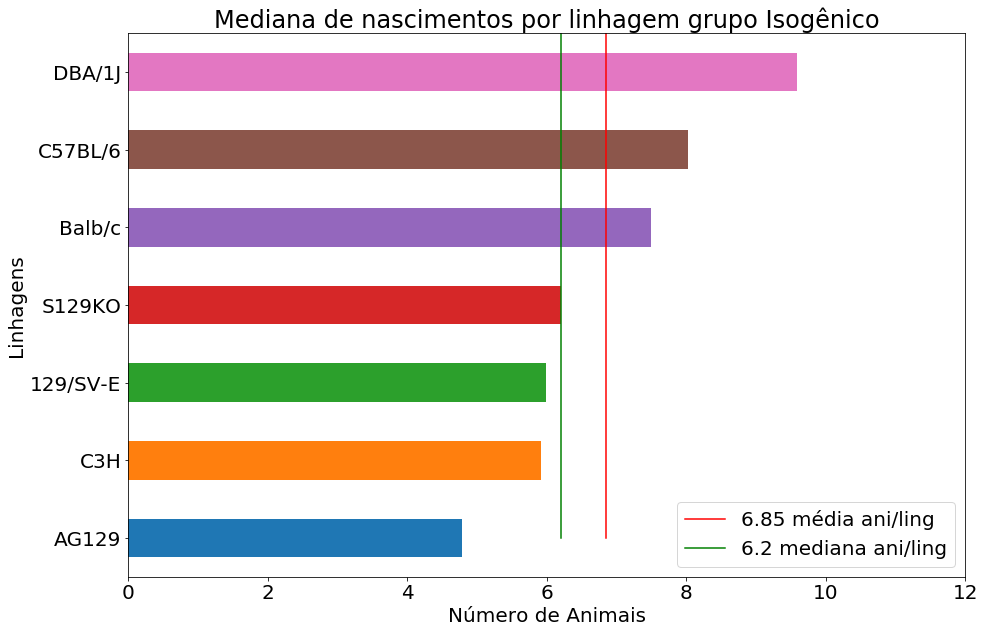

In [101]:
#Gráfico plotando é mediana por grupo: Isogênico

plt.figure(figsize=(15,10))
plt.title('Mediana de nascimentos por linhagem grupo Isogênico')

plot = linhagens_iso.groupby('ling')
plot['num_ani'].mean().sort_values(ascending=True).plot(
kind='barh',
     xlim=(0,12) #arrumando a escala do gráfico de 0 a 12
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#plotando faixas de média e mediana


plt.plot( #função para plotar o gráfico
    [media_iso, media_iso], #faixa que marca a média
    [len(sem_out.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana_iso, mediana_iso], #faixa que marca a mediana
    [len(sem_out.index), 0], 
    c='green' #cor verde da faixa
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando as legendas 

plt.legend([str(media_iso) + ' média ani/ling', str(mediana_iso) + ' mediana ani/ling'])
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../../resultados/isogenico_semoutliers.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

+++++++++++++++++++++++++++++ Calculando a mediana por grupo Heterogênico +++++++++++++++++++++++++++

In [102]:
ling_het = ['Swiss-1 A','Swiss-1 B','Swiss-1 C','Swiss-1 D','Swiss-1 E',
           'Swiss-2 A','Swiss-2 B','Swiss-2 C','Swiss-2 D','Swiss-2 E']  

g_het = sem_out[sem_out['ling'].isin(ling_het)].groupby('ling')
linhagens_het = g_het.mean()
linhagens_het

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
Swiss-1 A,10.130435,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.217391,10.130435,579.565217,594.021739,666.0,666.0
Swiss-1 B,10.085714,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.314286,10.085714,552.428571,552.400000,666.0,666.0
Swiss-1 C,9.500000,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.352941,9.500000,529.558824,568.676471,666.0,666.0
Swiss-1 D,10.090909,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.393939,10.090909,525.515152,605.727273,666.0,666.0
Swiss-1 E,9.585366,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.365854,9.585366,617.585366,552.951220,666.0,666.0
Swiss-2 A,10.761905,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.047619,10.761905,602.809524,539.714286,666.0,666.0
Swiss-2 B,10.500000,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.000000,10.500000,583.125000,500.125000,666.0,666.0
Swiss-2 C,9.851852,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.185185,9.851852,616.962963,518.592593,666.0,666.0
Swiss-2 D,10.250000,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.000000,10.250000,500.300000,599.850000,666.0,666.0


In [103]:
mediana_het = round(linhagens_het['num_ani'].median(),2)
mediana_het

10.09

In [104]:
media_het = round(linhagens_het['num_ani'].mean(),2)
media_het

10.07

R. A mediana do grupo de animais heterogênicos possui uma média de 10,07 filhotes por nascimento e a mediana 10,09. O que já foi descrito na literatura que essas linhagêns possuem uma variabilidde genética superior, produzindo uma maior quantidade de filhotes em comparação aos isogênicos.

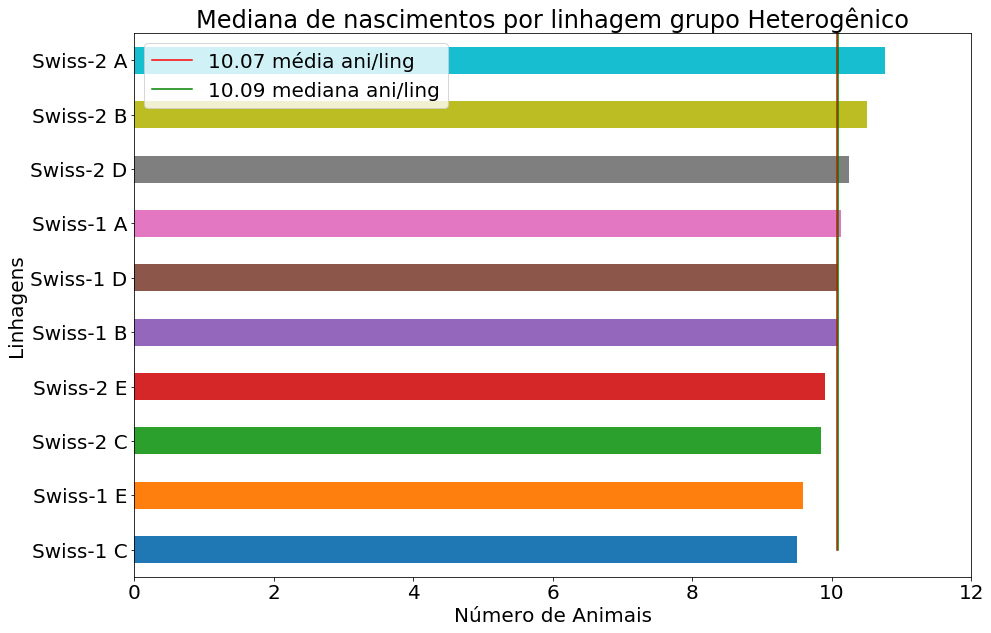

In [105]:
#Gráfico plotando é mediana por grupo: Isogênico

plt.figure(figsize=(15,10))
plt.title('Mediana de nascimentos por linhagem grupo Heterogênico')

plot = linhagens_het.groupby('ling')
plot['num_ani'].mean().sort_values(ascending=True).plot(
kind='barh',
     xlim=(0,12) #arrumando a escala do gráfico de 0 a 12
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#plotando faixas de média e mediana


plt.plot( #função para plotar o gráfico
    [media_het, media_het], #faixa que marca a média
    [len(sem_out.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana_het, mediana_het], #faixa que marca a mediana
    [len(sem_out.index), 0], 
    c='green' #cor verde da faixa
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando as legendas 

plt.legend([str(media_het) + ' média ani/ling', str(mediana_het) + ' mediana ani/ling'])
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../../resultados/heterogenico_semoutliers.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)